In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dataset is from https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/ 

Analyzed the data and predict the total litres served given the servings. 


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
print(df.dtypes)

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [6]:
df_gptest = df[['wine_servings','continent']]
df_gptest1 = df_gptest.groupby(['continent'], as_index=False).sum()
df_gptest1

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


Made boxplot to show total beer servings for each continent.

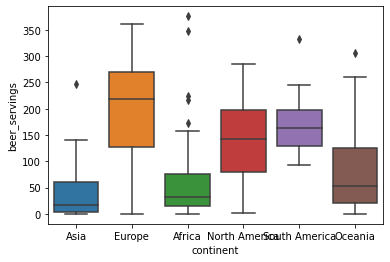

In [7]:
sns.boxplot(x = "continent", y = "beer_servings", data=df)

Used regplot function from seaborn package to determine if the number of wine servings is negatively or positively correlated with the number of beer servings. Here you can see that it is a positive linear line therefore it is correlated. 

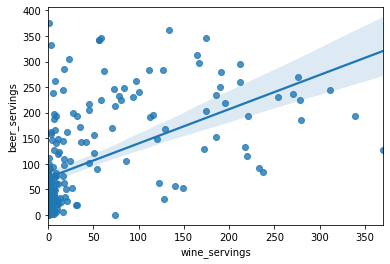

In [8]:
import seaborn as sns 
sns.regplot(x="wine_servings", y="beer_servings", data=df)

Fitted linear regression line to predict the "total_litres_of_pure_alcohol" using the number of "wine_servings" then calculated the R^2

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df[['total_litres_of_pure_alcohol']]
Y = df[['wine_servings']]

lm.fit(X,Y)
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.4456875459787605


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#lit_palc = df[['total_litres_of_pure_alcohol']]
#lit_palc

y_data = df['total_litres_of_pure_alcohol']
x_data = df.drop('total_litres_of_pure_alcohol',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of test samples:", x_train.shape[0])

number of test samples: 39
number of test samples: 154


In [14]:
lre = LinearRegression()
lre.fit(x_train[['beer_servings']], y_train)
lre.score(x_test[['beer_servings']], y_test)

0.5701156369791256

In [15]:
lre.score(x_train[['beer_servings']], y_train)

0.7172263343792056

Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. 

In [16]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [17]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [18]:
pipe = Pipeline(Input)
pipe.fit(x_train[['beer_servings']], y_train)
pipe.score(x_test[['beer_servings']], y_test)

0.5770472247414806

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the  𝑅2  using the test data. 

In [20]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train[['beer_servings']], y_train)
RidgeModel.score(x_test[['beer_servings']], y_test)

0.5701156553576647

Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the  𝑅2  utilizing the test data provided.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['beer_servings']])
x_test_pr = pr.fit_transform(x_test[['beer_servings']])
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [22]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
yhat = poly.predict(x_test_pr)
yhat[0:2]

array([8.36450178, 3.31652568])

In [24]:
poly.score(x_train_pr, y_train)

0.7620985160298901

In [25]:
poly.score(x_test_pr, y_test)

0.5770472247414751

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr = LinearRegression()
Rsqu_test = []
order = [1, 2]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fitx_train_pr = pr.fit_transform(x_train[['beer_servings']])
    x_test_pr = pr.fit_transform(x_test[['beer_servings']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R-squared')
plt.title('R-squared using Test Data')
plt.text(2, 1, 'Maximum R-squared')